# TensorFlow Workflow and Project Definition

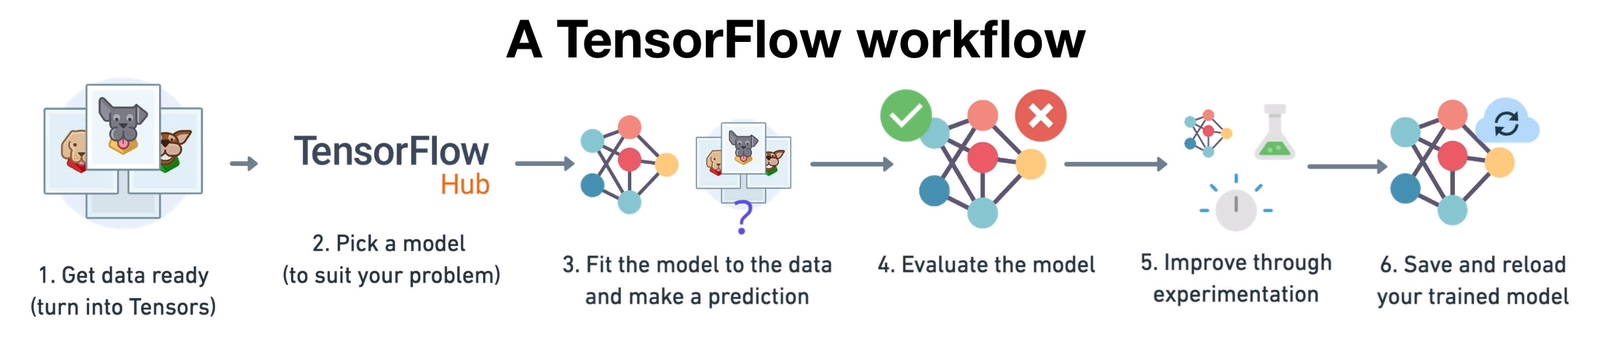

Data files contain images of numbers from 0 to 9.
The goal of this project is to train a machine learning model that can guess the number in images.

#0.Setting Up the Environment

In [ ]:
from tensorflow._api.v2.config.experimental import list_physical_devices
#importing necessary tools
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
print("TF Version:", tf.__version__)
print("hub Version:", hub.__version__)
#checking for gpu availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available" )
print(tf.config.get_visible_devices)

TF Version: 2.12.0
hub Version: 0.14.0
GPU available
<function get_visible_devices at 0x7c026d572200>


#1.Getting data ready

importing the data

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


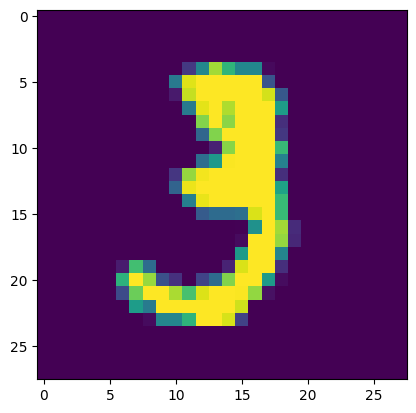

In [ ]:
plt.imshow(X_train[10])

In [ ]:
#imgages has size of 28x28
print(X_train.shape , Y_train.shape )
#pixels range from 0 to 255
print(X_train.min(), X_train.max())
#labels are 0 to 9
print(Y_train.min(), Y_train.max())

(60000, 28, 28) (60000,)
0 255
0 9


In [ ]:
#normalizing the images
X_train , X_test = X_train/255.0 , X_test/255.0
print(X_train.min(), X_train.max())

0.0 1.0


In [ ]:
#splitting the test data into validation and test data sets
from sklearn.model_selection import train_test_split
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.2)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(60000, 28, 28, 1) (8000, 28, 28, 1) (2000, 28, 28, 1)


In [ ]:
#reshaping the images
X_train , X_test = X_train.reshape(60000, 28, 28, 1) , X_test.reshape(2000, 28, 28, 1), X_val.reshape(8000, 28, 28, 1)
print(X_train.shape, X_val.shape, X_test.shape)
#the input of the model has the shape of images (28,28,1)

(60000, 28, 28, 1) (10000, 28, 28, 1)


#2.picking a model that solves the problem

In [ ]:
#making a model object
model = tf.keras.models.Sequential()
#adding first CNN layer
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
#adding second CNN layer
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
#adding maxpool layer (extracts dominant features and reduce the size of Conv2D features)
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
#adding dropout layer (helps to prevent overfitting)
model.add(tf.keras.layers.Dropout(0.4))
#adding flatten layer
model.add(tf.keras.layers.Flatten())
#fully connected layer (dense layer)
model.add(tf.keras.layers.Dense(units =128 , activation ='relu'))
#adding output layer
model.add(tf.keras.layers.Dense(units =10 , activation ='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['sparse_categorical_accuracy'])

#3.fit the model to the data and make predictions

In [ ]:
History = model.fit(X_train, Y_train, epochs=10, validation_data = (X_val, Y_val))

Epoch 1/10
1875/1875 [==============================] - 19s 3ms/step - loss: 0.1243 - sparse_categorical_accuracy: 0.9619 - val_loss: 0.0378 - val_sparse_categorical_accuracy: 0.9883
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0468 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.0532 - val_sparse_categorical_accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0332 - sparse_categorical_accuracy: 0.9898 - val_loss: 0.0339 - val_sparse_categorical_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - sparse_categorical_accuracy: 0.9921 - val_loss: 0.0396 - val_sparse_categorical_accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0195 - sparse_categorical_accuracy: 0.9934 - val_loss: 0.0314 - val_sparse_categorical_accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0151 - spar

In [ ]:
Y_pred = model.predict(X_test,  verbose =1)

63/63 [==============================] - 0s 2ms/step


In [ ]:
Y_pred, np.argmax(Y_pred, axis=1)

(array([[5.2730236e-17, 2.0349762e-06, 1.5484374e-11, ..., 3.2990575e-09,
         2.4781565e-14, 1.9370390e-09],
        [1.1535567e-13, 1.0000000e+00, 9.1668345e-10, ..., 5.7304222e-10,
         4.5219883e-10, 2.1599417e-10],
        [6.8246402e-23, 2.9225273e-15, 8.4811937e-16, ..., 1.0717951e-17,
         3.3626517e-16, 1.6116360e-10],
        ...,
        [1.7577340e-12, 3.1981104e-10, 1.0000000e+00, ..., 1.8566797e-11,
         1.4707744e-09, 1.3727845e-15],
        [1.5170364e-24, 2.6362999e-21, 6.3182336e-14, ..., 4.9438081e-17,
         1.0000000e+00, 1.7953181e-15],
        [9.9206780e-12, 2.5703168e-09, 4.3053515e-06, ..., 1.6644757e-13,
         9.9950697e-09, 2.3295774e-04]], dtype=float32),
 array([3, 1, 5, ..., 2, 8, 4]))

#4. evaluating the model

## plotting confusion matrix

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
pred_index = np.argmax(Y_pred, axis=1)
CM = confusion_matrix(Y_test,pred_index)
CM

array([[208,   0,   0,   0,   0,   0,   0,   1,   1,   0],
       [  0, 255,   0,   0,   0,   1,   0,   1,   0,   0],
       [  0,   0, 191,   1,   0,   0,   0,   1,   0,   0],
       [  0,   0,   1, 190,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 178,   0,   0,   0,   0,   5],
       [  0,   0,   0,   2,   0, 190,   0,   0,   0,   0],
       [  1,   1,   0,   0,   1,   0, 191,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 189,   0,   2],
       [  1,   0,   0,   0,   0,   0,   0,   0, 199,   0],
       [  0,   0,   0,   1,   1,   0,   0,   0,   1, 186]])

## getting accuracy score

In [ ]:
# creating a function to ease the evaluation of model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def evaluation_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    metric_dic = { "accuracy" : round(accuracy, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}")

    return metric_dic

evaluation_preds(Y_test, np.argmax(Y_pred, axis=1))

Accuracy: 98.85


{'accuracy': 0.99}

In [ ]:
accuracy_score(Y_test,pred_index)

0.9885

## plotting prediction, picture and the label

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get pred label
  pred_label = Y_test[n]

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{}   {:2.0f}%    {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

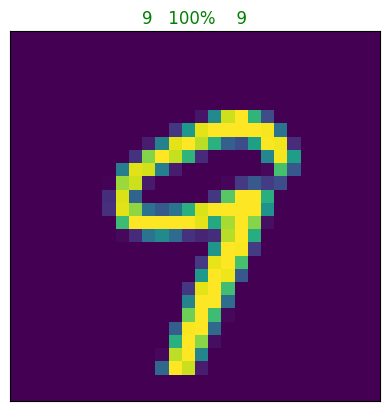

In [ ]:
plot_pred(prediction_probabilities=Y_pred, labels=Y_test, images=X_test, n=10)

In [ ]:
# This function is for ploting the top predictions
def plot_pred_conf(prediction_probabilities, labels, n=0):
  pred_prob, true_label = prediction_probabilities[n], labels[n]
  # Get the predicted label
  pred_label = Y_test[n]
  # Find top prediction confidence indexes
  pred_indexes = pred_prob.argsort()[-5:][::-1]
  # Find the top predictions confidence values
  pred_values = pred_prob[pred_indexes]
  # Find the top prediction labels
  pred_labels = pred_indexes
  # Setup plot
  top_plot = plt.bar(np.arange(len(pred_labels)),
                     pred_values,
                     color="grey")
  plt.xticks(np.arange(len(pred_labels)),
             labels=pred_labels,
             rotation="vertical")
  # Change color of true label
  if np.isin(true_label, pred_labels):
    top_plot[np.argmax(pred_labels == true_label)].set_color("green")
  else:
    pass

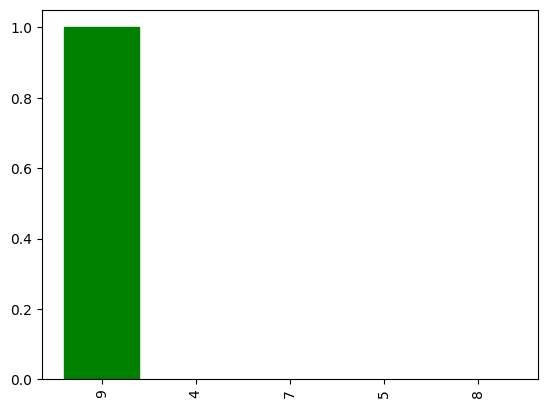

In [ ]:
plot_pred_conf(prediction_probabilities=Y_pred, labels=Y_test, n=10)

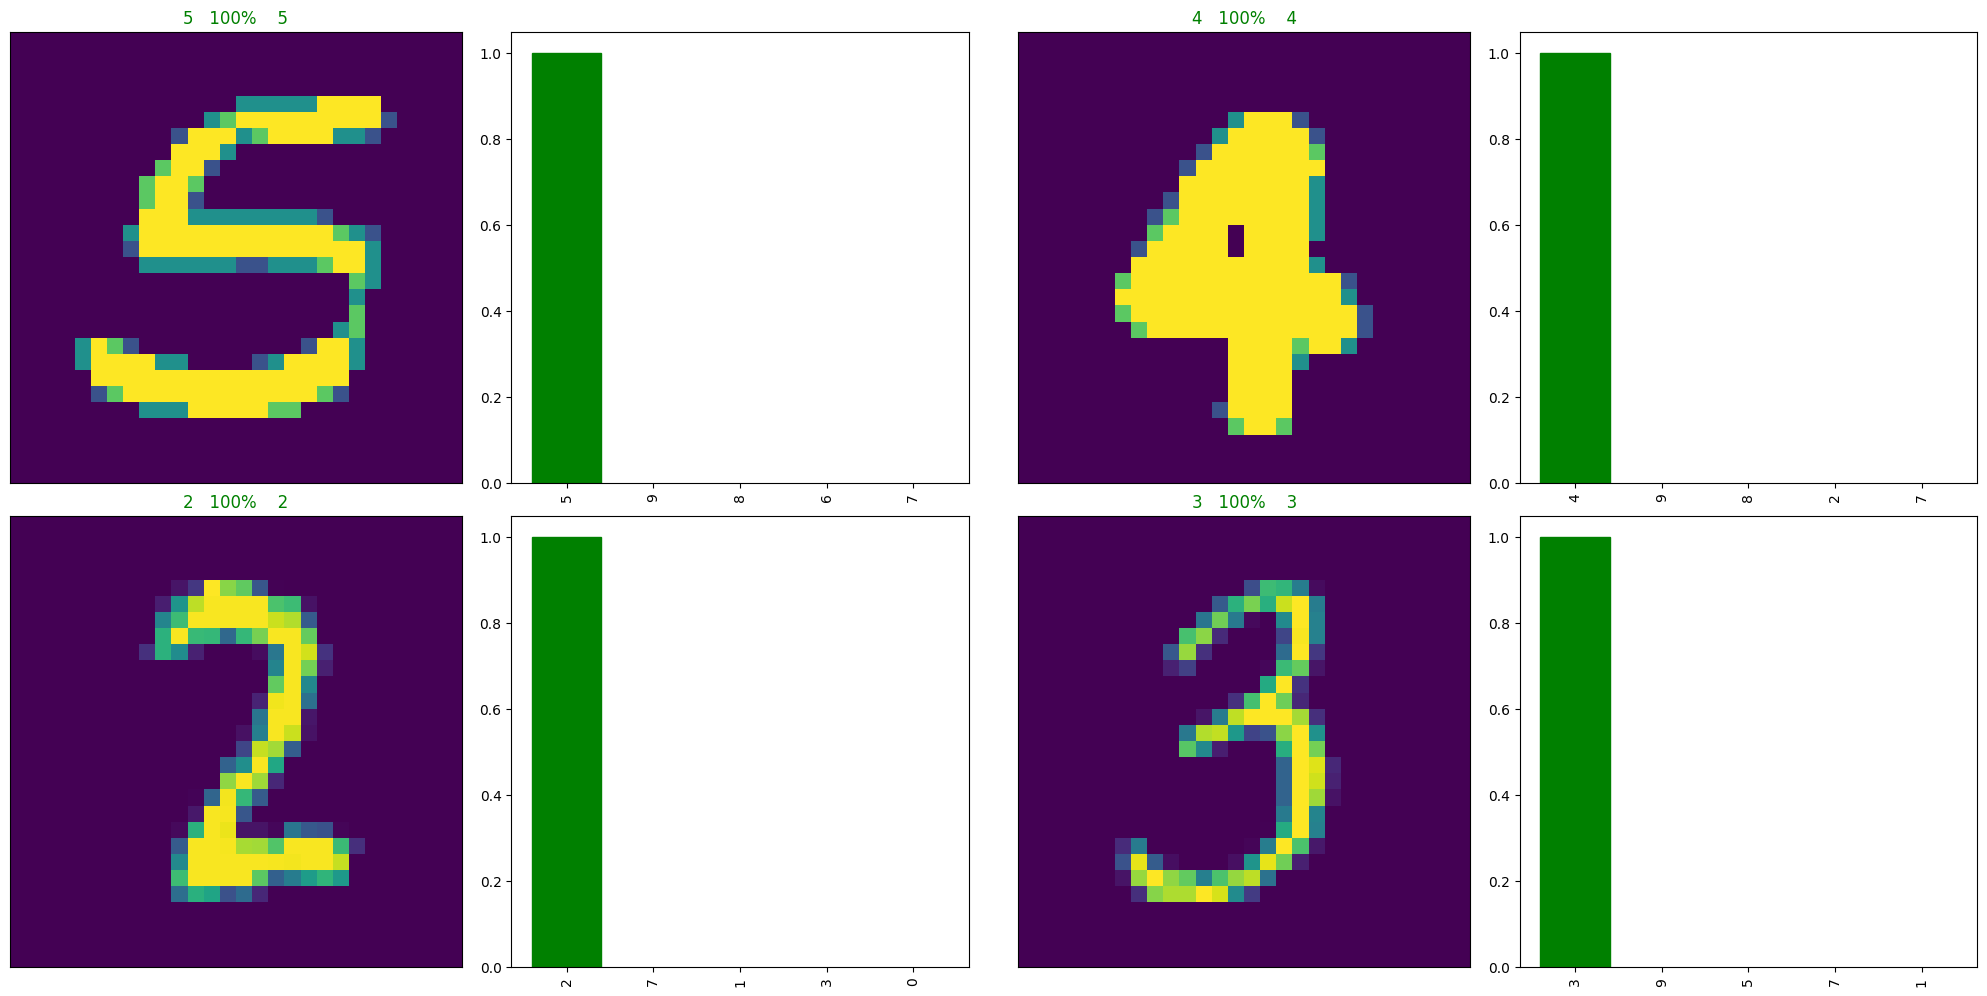

In [ ]:
# Cheking the predictions and their different values
i_multiplier = 30
num_rows = 2
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=Y_pred,
            labels=Y_test,
            images=X_test,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=Y_pred,
                 labels=Y_test,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## learning curvce

In [ ]:
def learning_curve(history, epoch):
  #training vs validation accuracy
  epoch_range = range(1, epoch + 1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()
  #training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()

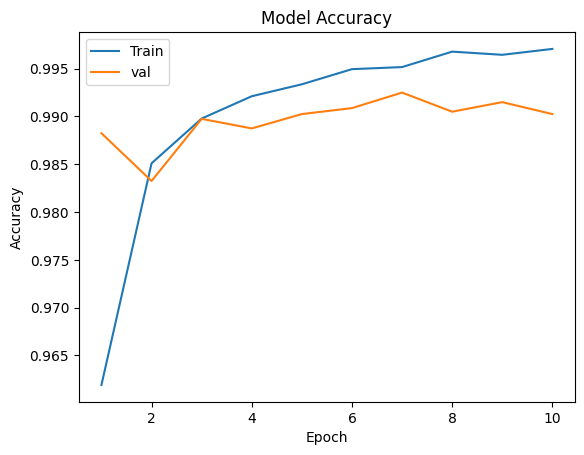

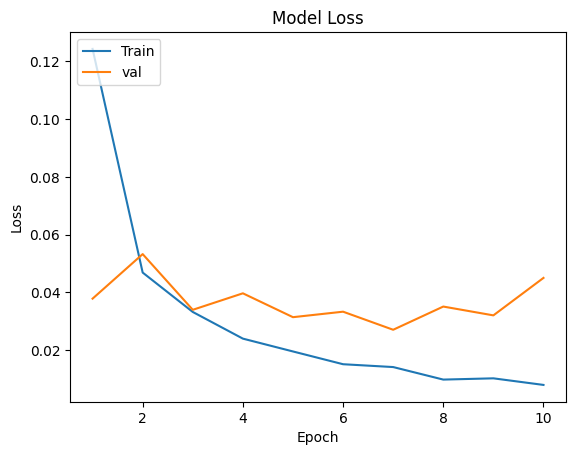

In [ ]:
#validation accuracy is acreasing as the training accuracy increases so model is not overfitted
#training loss in decreasing and the validation loss is also decreasing
learning_curve(History, 10)

# 5.Saving and loading the model

In [ ]:
import datetime
import os
def save_model(model, suffix=None):

  # Create a model directory pathname with current time
  modeldir = os.path.join("//content/drive/MyDrive/datasets/trainedModels", datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%s"))
  model_path = modeldir + "-" + suffix + ".h5"
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  print(f"Loading the saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Saving the model
save_model(model, suffix="trained_model")

'//content/drive/MyDrive/datasets/trainedModels/2023-09-02_06-46-1693637197-trained_model.h5'

In [ ]:
#loading the model
loaded_model = load_model("//content/drive/MyDrive/datasets/trainedModels/2023-09-02_01-14-1693617242-trained_model.h5")

Loading the saved model from: //content/drive/MyDrive/datasets/trainedModels/2023-09-02_01-14-1693617242-trained_model.h5
